In [1]:
import pandas as pd

# Load the uploaded CSV file to check its structure
file_path = 'SolarPrediction.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


(     UNIXTime                   Data      Time  Radiation  Temperature  \
 0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
 1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
 2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
 3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
 4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
 
    Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
 0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
 1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
 2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
 3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
 4     30.46        62                  104.95   5.62    06:13:00   18:13:00  ,
 None)

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Calculate basic statistics for numerical columns
statistics = data.describe()

missing_values, statistics


(UNIXTime                  0
 Data                      0
 Time                      0
 Radiation                 0
 Temperature               0
 Pressure                  0
 Humidity                  0
 WindDirection(Degrees)    0
 Speed                     0
 TimeSunRise               0
 TimeSunSet                0
 dtype: int64,
            UNIXTime     Radiation   Temperature      Pressure      Humidity  \
 count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
 mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
 std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
 min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
 25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
 50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
 75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
 max    1.483265e+09   160

Training features shape: (26148, 9)
Testing features shape: (6538, 9)
Training target shape: (26148,)
Testing target shape: (6538,)


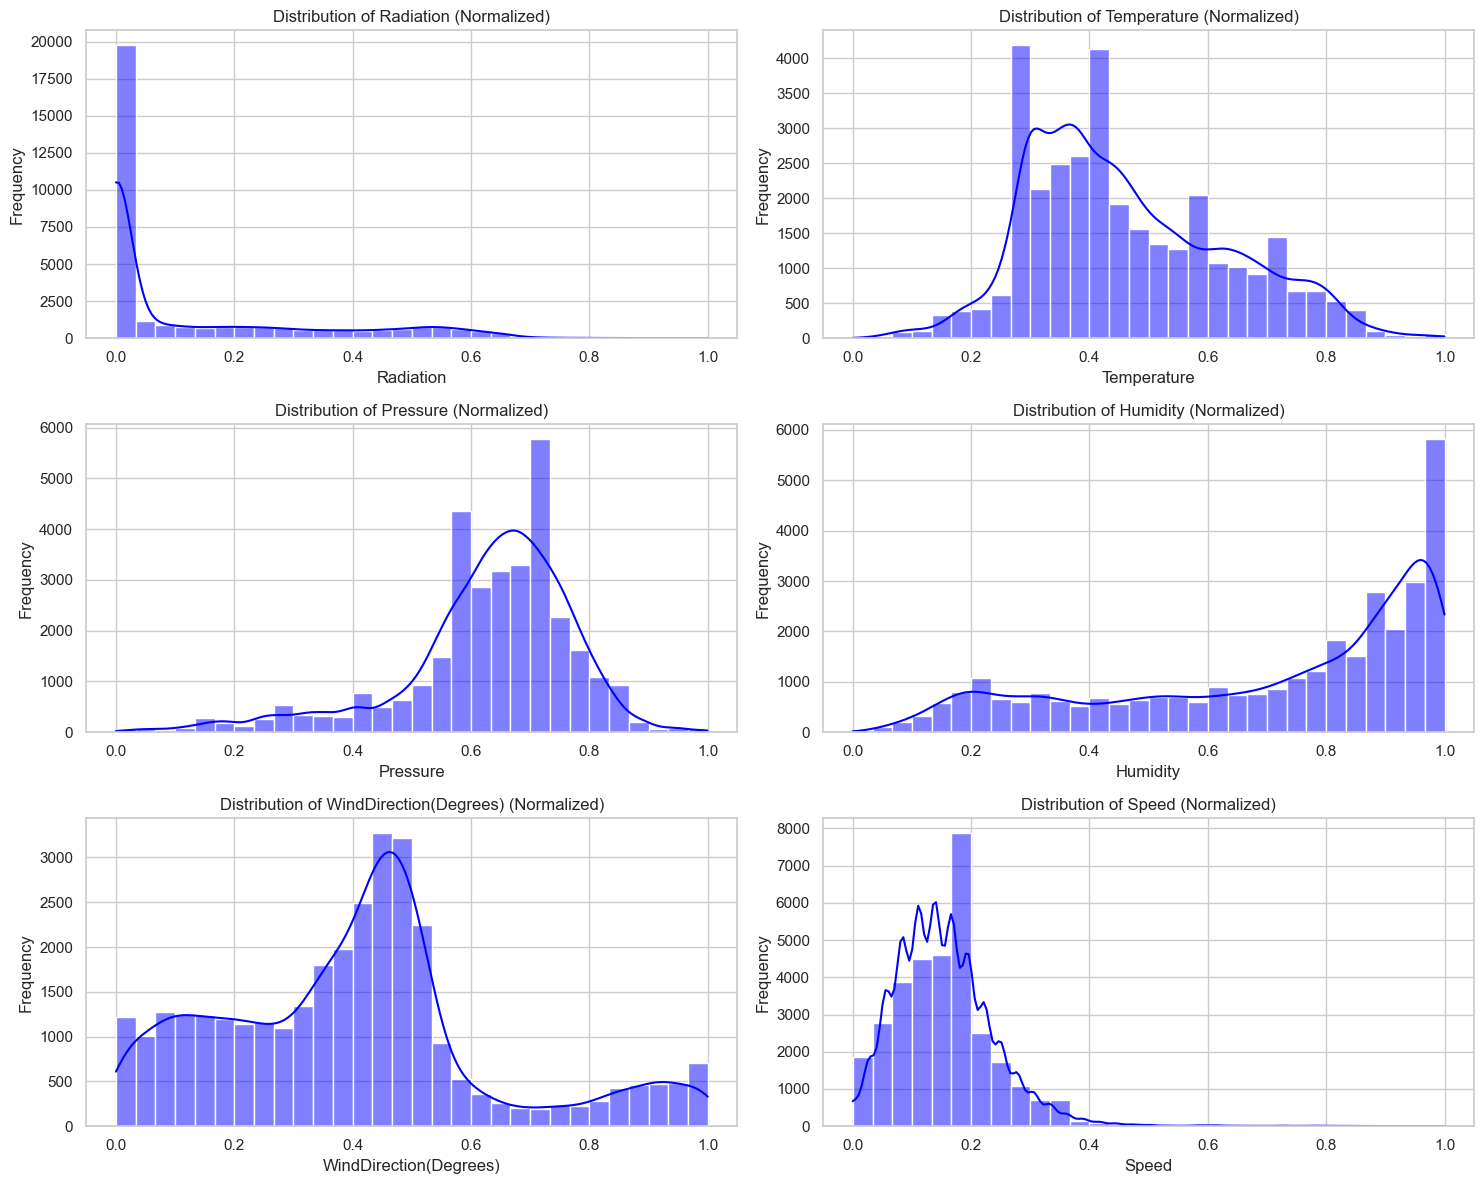

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Feature Engineering: Convert UNIXTime to datetime and extract features
data['DateTime'] = pd.to_datetime(data['UNIXTime'], unit='s')
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

# Calculate Daylight Duration
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S').dt.time
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S').dt.time
data['DaylightDuration'] = (
    pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S') - pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
).dt.total_seconds() / 3600

# Drop rows with invalid daylight duration (if any)
data = data[data['DaylightDuration'] >= 0]

# Normalize numerical columns
numerical_columns = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
normalized_data = data.copy()
normalized_data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (
    data[numerical_columns].max() - data[numerical_columns].min()
)

# Select features and target
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Hour', 'Day', 'Month', 'DaylightDuration']
target = 'Radiation'
X = normalized_data[features]
y = normalized_data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Convert to numpy arrays for neural network compatibility
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Display dataset shapes
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Create histograms for numerical columns
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(normalized_data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column} (Normalized)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0481 - mae: 0.1463 - val_loss: 0.0264 - val_mae: 0.1357
Epoch 2/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0108 - mae: 0.0754 - val_loss: 0.0122 - val_mae: 0.0826
Epoch 3/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0094 - mae: 0.0693 - val_loss: 0.0103 - val_mae: 0.0720
Epoch 4/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0079 - mae: 0.0614 - val_loss: 0.0095 - val_mae: 0.0687
Epoch 5/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0087 - mae: 0.0656 - val_loss: 0.0212 - val_mae: 0.1243
Epoch 6/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0092 - mae: 0.0679 - val_loss: 0.0077 - val_mae: 0.0606
Epoch 7/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0076 - mae: 0.0603 - val_loss: 0.0167 - val_mae: 0.1023
Epoch 8/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0077 - mae: 0.0615 - val_loss: 0.0072 - val_mae: 0.0582
Epoch 9/50
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

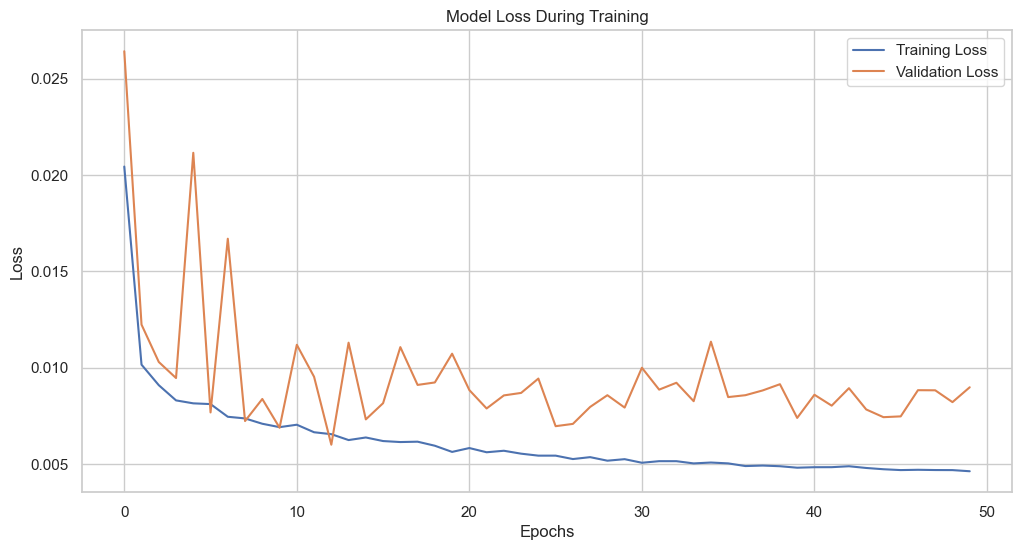

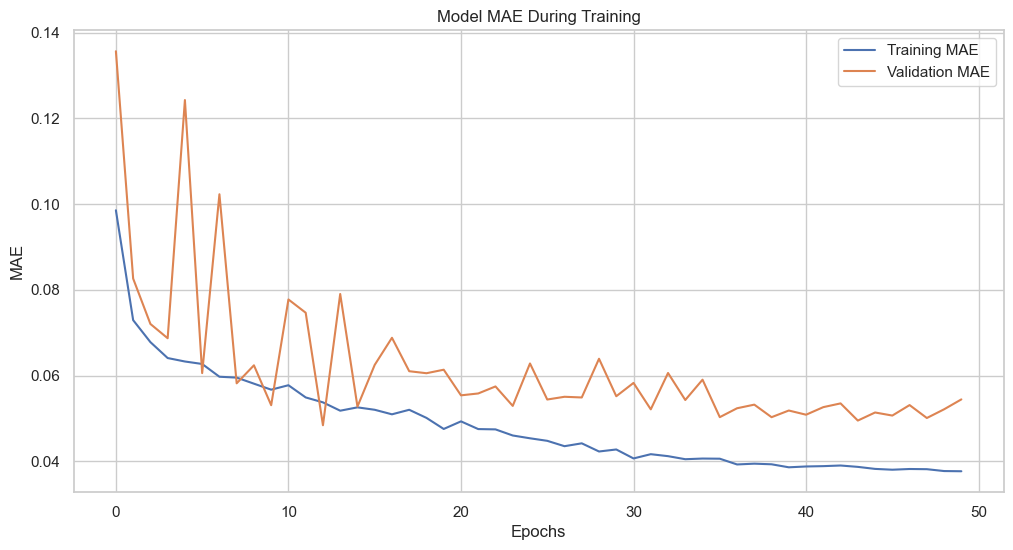

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
Root Mean Squared Error (RMSE): 0.0948
R² Score: 0.6119


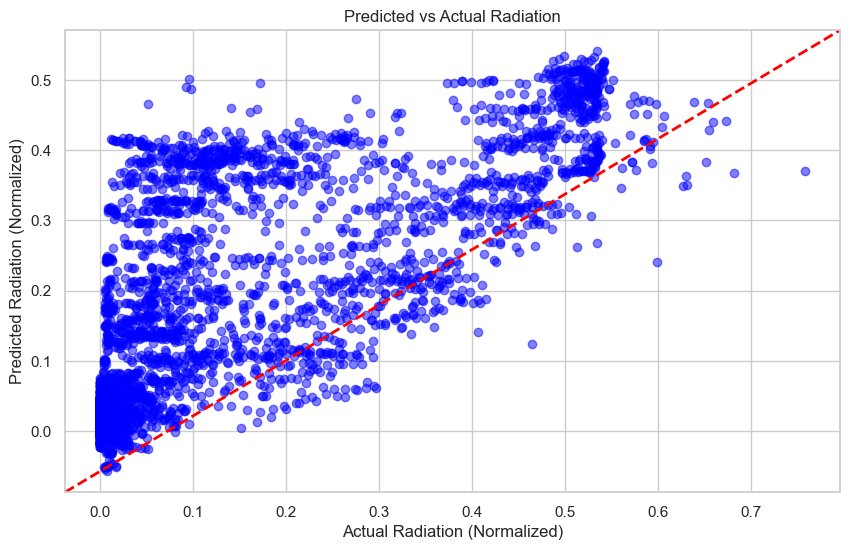

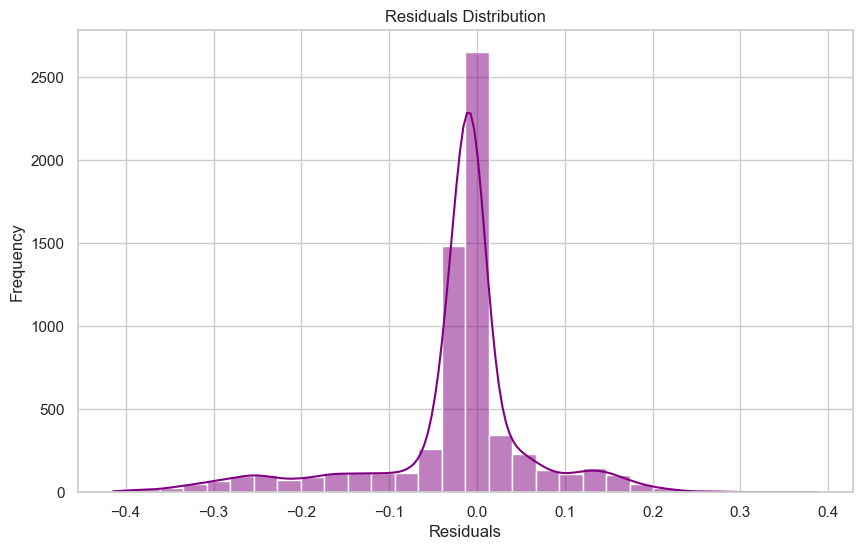

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Plot Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, transform=plt.gca().transAxes)
plt.title('Predicted vs Actual Radiation')
plt.xlabel('Actual Radiation (Normalized)')
plt.ylabel('Predicted Radiation (Normalized)')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_test - y_pred.reshape(-1)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
